<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793654/blob/main/Reto_Aguas_subterraneas_E1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
from sklearn import linear_model as lm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sts
import pandas as pd
import scipy as scp
import numpy as np
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split  ### for train and test split package
from sklearn import metrics  ## For calculation of MSE & RMSE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score

import requests, zipfile
from io import BytesIO

In [204]:
url = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

In [205]:
req = requests.get(url)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')
df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [207]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [208]:
# 
ubicacion = ['ESTADO','MUNICIPIO']

categoricas = ['CALIDAD_ALC',
                'CALIDAD_CONDUC',
                'CALIDAD_SDT_ra',
                'CALIDAD_SDT_salin',
                'CALIDAD_FLUO',
                'CALIDAD_DUR',
                'CALIDAD_COLI_FEC',
                'CALIDAD_N_NO3',
                'CALIDAD_AS',
                'CALIDAD_CD',
                'CALIDAD_CR',
                'CALIDAD_HG',
                'CALIDAD_PB',
                'CALIDAD_MN',
                'CALIDAD_FE']

mediciones = ['ALC_mg/L', 'CONDUCT_mS/cm',
              'SDT_M_mg/L', 'FLUORUROS_mg/L',
              'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
              'N_NO3_mg/L', 'AS_TOT_mg/L',
              'CD_TOT_mg/L', 'CR_TOT_mg/L',
              'HG_TOT_mg/L', 'PB_TOT_mg/L', 
              'MN_TOT_mg/L', 'FE_TOT_mg/L',]

coordenadas = ['LATITUD','LONGITUD']

binarias = ['CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
            'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
            'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
            'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
            'CUMPLE_CON_FE']

calidad=['SEMAFORO']

In [209]:
df[ubicacion].value_counts()

ESTADO                MUNICIPIO             
BAJA CALIFORNIA SUR   LA PAZ                    27
BAJA CALIFORNIA       ENSENADA                  26
COAHUILA DE ZARAGOZA  PARRAS                    24
SONORA                HERMOSILLO                17
YUCATAN               MERIDA                    16
                                                ..
PUEBLA                SAN JOSE MIAHUATLAN        1
COAHUILA DE ZARAGOZA  ARTEAGA                    1
PUEBLA                CUAPIAXTLA DE MADERO       1
                      CORONANGO                  1
OAXACA                SAN LORENZO CACAOTEPEC     1
Length: 462, dtype: int64

In [210]:
df[ubicacion].describe()

,ESTADO,MUNICIPIO
count,1068,1068
unique,32,452
top,DURANGO,LA PAZ
freq,121,27


In [211]:
df[categoricas].describe()

,CALIDAD_ALC,CALIDAD_CONDUC,CALIDAD_SDT_ra,CALIDAD_SDT_salin,CALIDAD_FLUO,CALIDAD_DUR,CALIDAD_COLI_FEC,CALIDAD_N_NO3,CALIDAD_AS,CALIDAD_CD,CALIDAD_CR,CALIDAD_HG,CALIDAD_PB,CALIDAD_MN,CALIDAD_FE
count,1064,1062,1066,1066,1068,1067,1068,1067,1068,1068,1068,1068,1068,1068,1068
unique,4,5,5,4,4,4,5,3,3,2,2,2,2,3,2
top,Alta,Permisible para riego,Excelente para riego,Potable - Dulce,Baja,Potable - Dura,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente,Potable - Excelente
freq,794,460,491,834,434,577,739,788,816,1066,1053,1067,1056,982,932


In [212]:
df[categoricas].isnull().sum()

CALIDAD_ALC          4
CALIDAD_CONDUC       6
CALIDAD_SDT_ra       2
CALIDAD_SDT_salin    2
CALIDAD_FLUO         0
CALIDAD_DUR          1
CALIDAD_COLI_FEC     0
CALIDAD_N_NO3        1
CALIDAD_AS           0
CALIDAD_CD           0
CALIDAD_CR           0
CALIDAD_HG           0
CALIDAD_PB           0
CALIDAD_MN           0
CALIDAD_FE           0
dtype: int64

In [213]:
df1=df[df['CALIDAD_ALC'].isnull()]
print(df1[calidad],df1[binarias])

    SEMAFORO
406     Rojo
407    Verde
722    Verde
861     Rojo     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
406             ND              SI                SI                   SI   
407             ND              SI                SI                   SI   
722             ND              SI                SI                   SI   
861             ND              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
406              SI             SI            SI             NO            SI   
407              SI             SI            SI             SI            SI   
722              SI             SI            SI             SI            SI   
861              NO             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
406            SI            SI            SI            SI       

In [214]:
df1=df[df['CALIDAD_CONDUC'].isnull()]
print(df1[calidad],df1[binarias])

     SEMAFORO
18       Rojo
281     Verde
293      Rojo
616  Amarillo
891     Verde
906     Verde     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
18              SI              ND                SI                   SI   
281             SI              ND                SI                   SI   
293             NO              ND                SI                   SI   
616             NO              ND                NO                   NO   
891             SI              ND                SI                   SI   
906             SI              ND                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
18               SI             SI            SI             SI            NO   
281              SI             SI            SI             SI            SI   
293              NO             SI            SI             SI            NO   
616              SI             NO    

In [215]:
df1=df[df['CALIDAD_SDT_ra'].isnull()]
print(df1[calidad],df1[binarias])

     SEMAFORO
175      Rojo
677  Amarillo     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
175             SI              SI                ND                   ND   
677             SI              SI                ND                   ND   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
175              SI             SI            SI             NO            SI   
677              SI             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
175            SI            SI            SI            SI            SI   
677            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
175            SI  
677            NO  


In [216]:
df1=df[df['CALIDAD_SDT_salin'].isnull()]
print(df1[calidad],df1[binarias])

     SEMAFORO
175      Rojo
677  Amarillo     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
175             SI              SI                ND                   ND   
677             SI              SI                ND                   ND   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
175              SI             SI            SI             NO            SI   
677              SI             SI            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
175            SI            SI            SI            SI            SI   
677            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
175            SI  
677            NO  


In [217]:
df1=df[df['CALIDAD_DUR'].isnull()]
print(df1[calidad],df1[binarias])

    SEMAFORO
635    Verde     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
635             SI              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
635              SI             ND            SI             SI            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
635            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
635            SI  


In [218]:
df1=df[df['CALIDAD_N_NO3'].isnull()]
print(df1[calidad],df1[binarias])

    SEMAFORO
234    Verde     CUMPLE_CON_ALC CUMPLE_CON_COND CUMPLE_CON_SDT_ra CUMPLE_CON_SDT_salin  \
234             SI              SI                SI                   SI   

    CUMPLE_CON_FLUO CUMPLE_CON_DUR CUMPLE_CON_CF CUMPLE_CON_NO3 CUMPLE_CON_AS  \
234              SI             SI            SI             ND            SI   

    CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
234            SI            SI            SI            SI            SI   

    CUMPLE_CON_FE  
234            SI  


In [219]:
df[mediciones].describe()

,ALC_mg/L,CONDUCT_mS/cm
count,1064.000000,1062.000000
mean,235.633759,1138.953013
std,116.874291,1245.563674
min,26.640000,50.400000
25%,164.000000,501.750000
50%,215.527500,815.000000
75%,292.710000,1322.750000
max,1650.000000,18577.000000


In [220]:
mediciones = ['ALC_mg/L', 'CONDUCT_mS/cm',
              'SDT_M_mg/L', 'FLUORUROS_mg/L',
              'DUR_mg/L', 'COLI_FEC_NMP/100_mL',
              'N_NO3_mg/L', 'AS_TOT_mg/L',
              'CD_TOT_mg/L', 'CR_TOT_mg/L',
              'HG_TOT_mg/L', 'PB_TOT_mg/L', 
              'MN_TOT_mg/L', 'FE_TOT_mg/L',]

# Variable Numerica 1

ALC_mg/L

In [221]:
df.loc[df['ALC_mg/L'] > 800, 'ALC_mg/L']=800

In [222]:
df['ALC_mg/L'].describe()

count    1064.000000
mean      234.212143
std       105.387420
min        26.640000
25%       164.000000
50%       215.527500
75%       292.710000
max       800.000000
Name: ALC_mg/L, dtype: float64

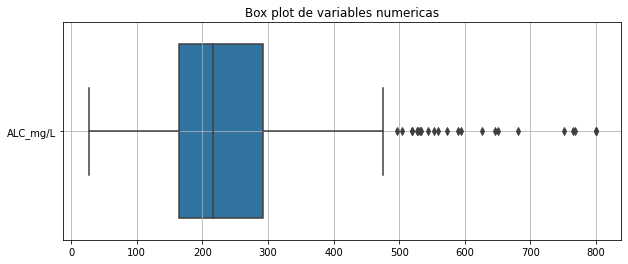

In [223]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['ALC_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

# Variable Numerica 2

CONDUCT_mS/cm

In [226]:
df.loc[df['CONDUCT_mS/cm'] > 5000, 'CONDUCT_mS/cm']=5000

In [227]:
df['CONDUCT_mS/cm'].describe()

count    1062.000000
mean     1092.947363
std       909.796293
min        50.400000
25%       501.750000
50%       815.000000
75%      1322.750000
max      5000.000000
Name: CONDUCT_mS/cm, dtype: float64

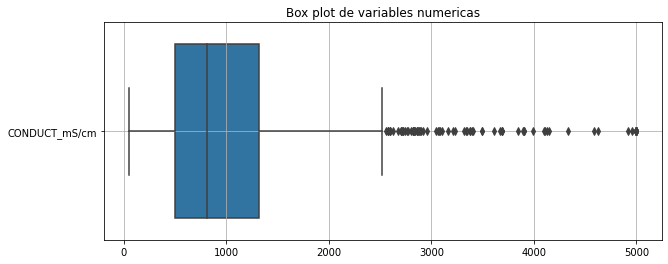

In [228]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['CONDUCT_mS/cm']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

# Variable Numerica 3

SDT_M_mg/L

In [147]:
# cambio de strin a numerico

df.loc[df['SDT_M_mg/L'] == '<25' , 'SDT_M_mg/L']='24'


In [148]:
df['SDT_M_mg/L'] = pd.to_numeric(df['SDT_M_mg/L'])

#pd.to_numeric(s, errors='coerce')

In [149]:
df['SDT_M_mg/L'].isnull().sum()

2

In [150]:

# Imputamos la variable bore con la media
df['SDT_M_mg/L'].fillna(df['SDT_M_mg/L'].median(), inplace=True)

#simple = SimpleImputer().fit(df['SDT_M_mg/L'])
#median = simple.transform(df['SDT_M_mg/L'])

In [151]:
df['SDT_M_mg/L'].describe()

count     1068.000000
mean       895.453249
std       2748.991592
min         24.000000
25%        337.700000
50%        550.400000
75%        915.900000
max      82170.000000
Name: SDT_M_mg/L, dtype: float64

In [168]:
df['SDT_M_mg/L'].sort_values(ascending=False)

740    5000.0
17     5000.0
124    5000.0
37     5000.0
479    5000.0
        ...  
513     111.4
780     106.0
342     104.0
626     101.2
407      24.0
Name: SDT_M_mg/L, Length: 1068, dtype: float64

In [167]:
df.loc[df['SDT_M_mg/L'] > 5000.0000, 'SDT_M_mg/L']=5000.0000

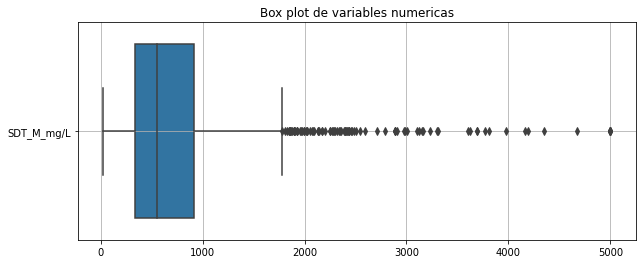

In [171]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['SDT_M_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

# Variable Numerica 4

FLUORUROS_mg/L

In [154]:
# cambio de string a numerico

df.loc[df['FLUORUROS_mg/L'] == '<0.2' , 'FLUORUROS_mg/L']='0.19'

In [155]:
df['FLUORUROS_mg/L'] = pd.to_numeric(df['FLUORUROS_mg/L'])

In [156]:
df['FLUORUROS_mg/L'].describe()

count    1068.000000
mean        1.074083
std         1.924973
min         0.190000
25%         0.267175
50%         0.503500
75%         1.139850
max        34.803300
Name: FLUORUROS_mg/L, dtype: float64

In [163]:
df.loc[df['FLUORUROS_mg/L'] > 10, 'FLUORUROS_mg/L']=10

In [164]:
df['FLUORUROS_mg/L'].sort_values(ascending=False)

377    10.00
345    10.00
210    10.00
98     10.00
224    10.00
       ...  
346     0.19
342     0.19
341     0.19
340     0.19
276     0.19
Name: FLUORUROS_mg/L, Length: 1068, dtype: float64

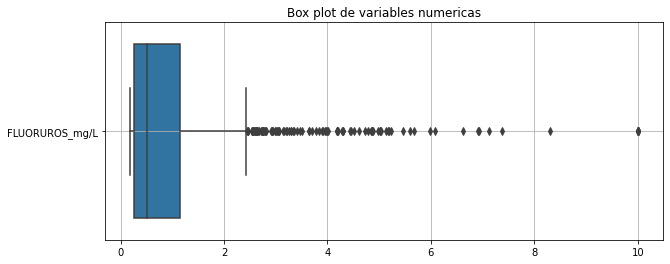

In [170]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['FLUORUROS_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

# Variable Numerica 5

DUR_mg/L

In [231]:
df.loc[df['DUR_mg/L'] == '<20' , 'DUR_mg/L']='19'

In [232]:
# convertimos a numerico
df['DUR_mg/L'] = pd.to_numeric(df['DUR_mg/L'])

In [234]:
df['DUR_mg/L'].isnull().sum()

1

In [235]:
# Imputamos la variable bore con la media
df['DUR_mg/L'].fillna(df['DUR_mg/L'].median(), inplace=True)

In [238]:
# reducimos los outliers

df.loc[df['DUR_mg/L'] >2000 , 'DUR_mg/L']=2000

In [239]:
df['DUR_mg/L'].describe()

count    1068.000000
mean      342.744347
std       324.621440
min        19.000000
25%       121.274100
50%       245.335800
75%       453.930000
max      2000.000000
Name: DUR_mg/L, dtype: float64

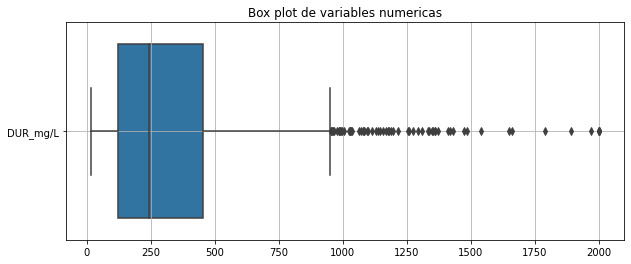

In [240]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['DUR_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()


# Variable Numerica 7
              
N_NO3_mg/L

In [242]:
df.loc[df['N_NO3_mg/L'] == '<0.02' , 'N_NO3_mg/L']='0.01'

In [243]:
# convertimos a numerico
df['N_NO3_mg/L'] = pd.to_numeric(df['N_NO3_mg/L'])

In [244]:
df['N_NO3_mg/L'].isnull().sum()

1

In [245]:
# Imputamos la variable bore con la media
df['N_NO3_mg/L'].fillna(df['N_NO3_mg/L'].median(), inplace=True)

In [247]:
# reducimos los outliers

df.loc[df['N_NO3_mg/L'] >40 , 'N_NO3_mg/L']=40

In [248]:
df['N_NO3_mg/L'].describe()

count    1068.000000
mean        4.034336
std         5.968090
min         0.010000
25%         0.650932
50%         2.080932
75%         5.200047
max        40.000000
Name: N_NO3_mg/L, dtype: float64

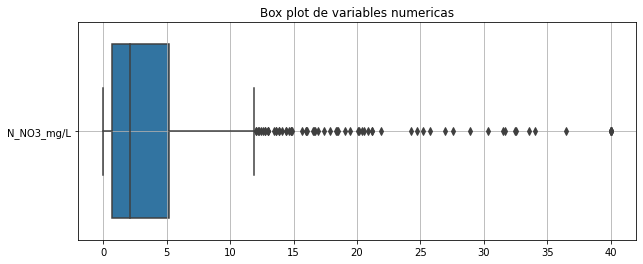

In [249]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df[['N_NO3_mg/L']], orient='h', ax=axs)
plt.title('Box plot de variables numericas')
plt.grid()
plt.show()

# Variable Numerica 6

COLI_FEC_NMP/100_mL

# Variable Numerica 8

AS_TOT_mg/L

# Variable Numerica 9

CD_TOT_mg/L


# Variable Numerica 10

CR_TOT_mg/L


# Variable Numerica 11

HG_TOT_mg/L

# Variable Numerica 12

PB_TOT_mg/L


# Variable Numerica 13

MN_TOT_mg/L

# Variable Numerica 14

FE_TOT_mg/L